# HYPER SPECTRAL IMAGING: INTRO

Hyperspectral imaging (HSI) is an advanced imaging technique that captures a wide spectrum of light beyond basic colors (RGB: red, green, blue) that the human eye can see. Unlike standard cameras, which record only three bands of light, hyperspectral cameras can capture hundreds of bands of light, covering a broader spectrum, often from ultraviolet (UV) to infrared (IR). Each band represents a specific wavelength range, giving detailed information about the spectral properties of the scene or object.





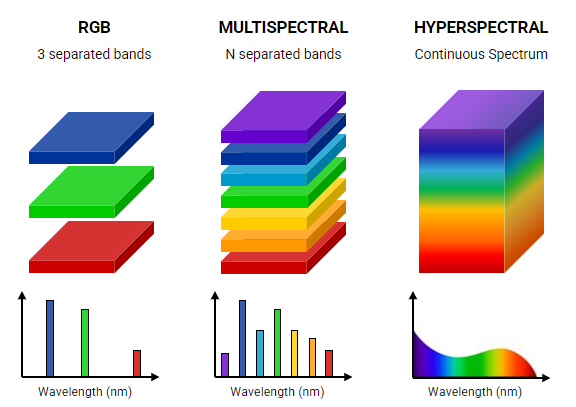

In [9]:
from PIL import Image, UnidentifiedImageError
import requests
from io import BytesIO
from IPython.display import display

url = "https://nireos.com/wp-content/uploads/2024/02/NIREOS_RGB-multispectral-and-hyperspectral-imaging.png"

try:
    # Fetch the image from the URL
    response = requests.get(url)
    response.raise_for_status()  # Check that the request was successful

    # Open the image with PIL
    image = Image.open(BytesIO(response.content))

    # Display the image inline
    display(image)

except UnidentifiedImageError:
    print("Error: Cannot identify the image file.")
except requests.RequestException as e:
    print("Error: Could not retrieve the image -", e)

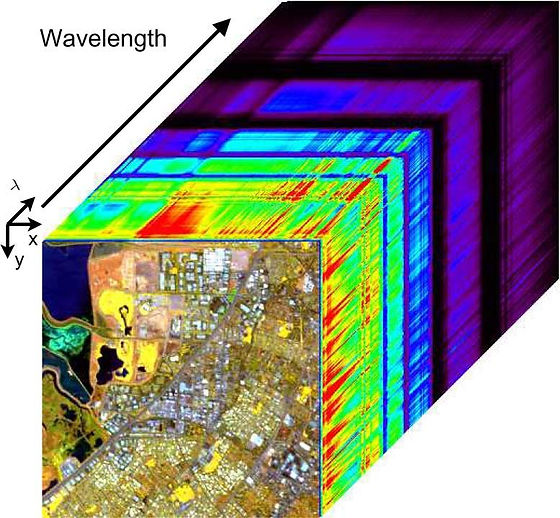

In [10]:
from PIL import Image, UnidentifiedImageError
import requests
from io import BytesIO
from IPython.display import display

url = "https://static.wixstatic.com/media/0ebea3_1ce3284da97547b39f8abb98421d7cb3~mv2.png/v1/fill/w_560,h_518,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/0ebea3_1ce3284da97547b39f8abb98421d7cb3~mv2.png"

try:
    # Fetch the image from the URL
    response = requests.get(url)
    response.raise_for_status()  # Check that the request was successful

    # Open the image with PIL
    image = Image.open(BytesIO(response.content))

    # Display the image inline
    display(image)

except UnidentifiedImageError:
    print("Error: Cannot identify the image file.")
except requests.RequestException as e:
    print("Error: Could not retrieve the image -", e)


# Difference Between HSI and RGB

Spectral Resolution: RGB imaging captures three broad wavelength bands corresponding to red, green, and blue. In contrast, HSI captures light in many very narrow bands over a wide range of wavelengths. This high spectral resolution allows for the detection of fine spectral differences that are not possible with RGB.

Data Dimensionality: RGB images are typically composed of three layers or channels, whereas HSI data is multi-dimensional, containing potentially hundreds of layers corresponding to different spectral bands.



# Model Compression Techniques for Hyperspectral Imaging

## Pruning
Pruning removes less significant weights or neurons in a neural network, reducing model size and computational load.

## Types of Pruning:

Weight Pruning: Removes individual, low-magnitude weights, making the model sparse. For HSI models, this is effective in reducing the storage requirement, especially in fully connected and convolutional layers.

Structured Pruning: Removes entire channels, filters, or layers, which is useful for maintaining the structure of hyperspectral data and is easier to deploy in production.

## Use in HSI:

Pruning is especially beneficial for HSI models with deep convolutional architectures, where spatial and spectral feature extraction across hundreds of channels can be computationally intensive.
It helps retain important spectral features while discarding redundant filters or neurons that contribute less to model accuracy.

## Quantization

Quantization reduces the precision of weights and activations (e.g., from 32-bit floating point to 8-bit integer), decreasing memory and computation costs.

### Types of Quantization:

Uniform Quantization: All weights and activations are uniformly quantized, effective for simple HSI classification tasks.
Non-Uniform Quantization: Uses a non-uniform distribution to better preserve important spectral and spatial features.

### Use in HSI:

Quantization is particularly useful when deploying models on edge devices (e.g., drones and satellites) where power efficiency and memory are limited.
It reduces latency in processing hyperspectral cubes while retaining spectral accuracy, which is critical for applications like crop monitoring or mineral exploration.

## Knowledge Distillation

Knowledge Distillation involves training a smaller “student” model to replicate the behavior of a larger “teacher” model.

## How It Works:

The teacher model, typically a large HSI network trained with extensive spectral data, provides “soft labels” or intermediate feature maps that guide the student model.
The student model learns from these outputs, resulting in a lightweight model with nearly comparable accuracy to the teacher model.

### Use in HSI:

Knowledge distillation is highly effective for creating smaller, efficient models that perform well in spectral classification tasks and material identification.
It is advantageous when deploying hyperspectral models in environments with limited computational resources, such as real-time monitoring systems.

## Low-Rank Factorization
Low-Rank Factorization decomposes the large weight matrices of the neural network into smaller, low-rank matrices, reducing the number of parameters and speeding up computations.

### Use in HSI:

Particularly effective for convolutional layers in HSI, where large filter sizes are common.
It enables efficient spectral-spatial feature extraction by decomposing filters into simpler operations, which helps with real-time data processing needs.

## Sparse Regularization
Sparse Regularization techniques enforce sparsity in model weights during training by adding a regularization term reducing storage requirements.

### Use in HSI:

Sparse regularization is useful for hyperspectral models that operate on limited-band subsets, retaining critical spectral information while reducing parameter count.
This is especially helpful when dealing with high-dimensional HSI data, where sparsity reduces redundancy across similar spectral bands.




# Considerations & Challenges in Model Compression for HSI

## Maintaining Spectral Integrity 
Compressing HSI models must be done with care to avoid losing spectral details essential for tasks like material classification or anomaly detection.

## Balancing Compression and Accuracy
For HSI, achieving the right balance between model size and accuracy is key, especially in scientific applications where spectral accuracy cannot be compromised.

## Real-Time Deployment Case
Hyperspectral models often need to process data in real-time on edge devices. Compression techniques like quantization and pruning are critical for achieving low latency in applications like disaster monitoring or agricultural mapping.

